In [47]:
#import library

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential


In [48]:
#Dimensionality
imgRow = 28
imgCols = 28
rgb = 1

imgShape = (imgRow,imgCols,rgb)
zDim = 100

In [49]:
#Generator
def buildGenerator(imgShape,zDim):
    model = Sequential()
    model.add(Dense(256,input_dim=zDim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1,activation="tanh"))
    model.add(Reshape(imgShape))
    return model

In [50]:
#Discriminator
def buildDiscriminator(imgShape):
    model= Sequential()
    model.add(Flatten(input_shape=imgShape))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation="sigmoid"))
    return model

In [51]:
#GAN
def buildGan(generator,discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [52]:
#Compiler
discriminator = buildDiscriminator(imgShape=imgShape)
discriminator.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

generator = buildGenerator(imgShape=imgShape,zDim=zDim)

discriminator.trainable = False

gan = buildGan(generator=generator,discriminator=discriminator)
gan.compile(optimizer="adam",loss="binary_crossentropy")

In [53]:
#Training algorithm 
losses=[]
accuracies = []
iterations = []

def training(iteration, batchSize,sampleInterval):
    (xTrain, _), (_,_) = mnist.load_data() #'cause unsupervised --> only interesseted in the pure data without label 
    xTrain = xTrain/127.5-1 #rescale grayscale
    xTrain = np.expand_dims(xTrain,axis=3)

    real = np.ones((batchSize,1))
    fake = np.zeros((batchSize,1))

    #Train discriminator
    for iter in range(iteration):
        idx = np.random.randint(0,xTrain.shape[0],batchSize)
        imgs = xTrain[idx]

        z = np.random.normal(0,1,(batchSize,100))
        genImgs = generator.predict(z)

        dLossReal = discriminator.train_on_batch(imgs,real)
        dLossFake = discriminator.train_on_batch(genImgs,fake)
        dLoss, accuracy = 1/2 * np.add(dLossReal,dLossFake)
    
        #Train generator
        z = np.random.normal(0,1,(batchSize,100))
        genImgs = generator.predict(z)

        gLoss = gan.train_on_batch(z,real)

        if (iter +1)%sampleInterval ==0:
            losses.append((dLoss,gLoss))
            accuracies.append((100.*accuracy))
            iterations.append(iter+1)
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %(iter + 1, dLoss, 100.0 * accuracy, gLoss))
            sampleImg(generator)



In [54]:
#Display generated img
def sampleImg(generator,imgGridRow = 4, imgGridColumn = 4):
    z = np.random.normal(0,1,(imgGridRow*imgGridColumn,zDim))
    genImg = generator.predict(z)
    genImg = 1/2*genImg+0.5 #change from tanh[-1,1] to sigmoid[0,1]

    fig, axs = plt.subplots(imgGridRow,imgGridColumn,figsize=(4,4),sharey = True,sharex=True)
    
    cnt = 0
    for i in range(imgGridRow):
        for j in range(imgGridColumn):
            axs[i,j].imshow(genImg[cnt,:,:,0],cmap="gray")
            axs[i,j].axis("off")
            cnt+=1

1000 [D loss: 0.060638, acc.: 99.61%] [G loss: 3.856640]
2000 [D loss: 0.089426, acc.: 97.66%] [G loss: 4.996008]
3000 [D loss: 0.069308, acc.: 97.66%] [G loss: 5.184024]
4000 [D loss: 0.171577, acc.: 92.97%] [G loss: 5.735524]
5000 [D loss: 0.287124, acc.: 89.06%] [G loss: 4.547426]
6000 [D loss: 0.256127, acc.: 87.50%] [G loss: 4.892801]
7000 [D loss: 0.299324, acc.: 88.28%] [G loss: 3.249431]
8000 [D loss: 0.154463, acc.: 93.75%] [G loss: 5.228459]
9000 [D loss: 0.190626, acc.: 91.41%] [G loss: 4.409009]
10000 [D loss: 0.326133, acc.: 89.06%] [G loss: 3.507710]
11000 [D loss: 0.366182, acc.: 82.81%] [G loss: 2.535482]
12000 [D loss: 0.244366, acc.: 90.62%] [G loss: 3.344453]
13000 [D loss: 0.447111, acc.: 81.25%] [G loss: 2.754967]
14000 [D loss: 0.453012, acc.: 82.81%] [G loss: 2.687559]
15000 [D loss: 0.297149, acc.: 86.33%] [G loss: 3.328634]
16000 [D loss: 0.275955, acc.: 87.50%] [G loss: 2.809098]
17000 [D loss: 0.237466, acc.: 90.62%] [G loss: 2.650850]
18000 [D loss: 0.304174

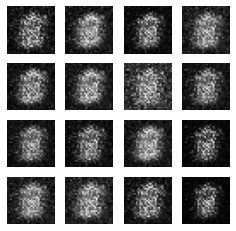

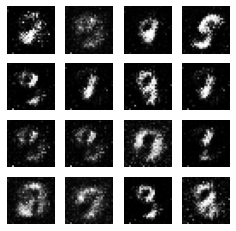

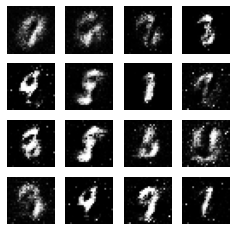

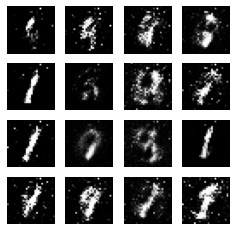

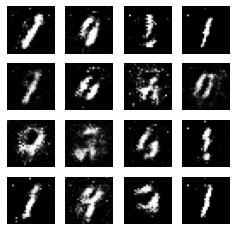

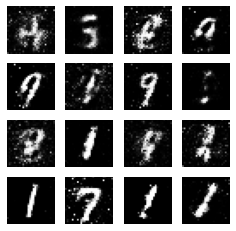

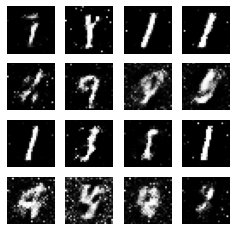

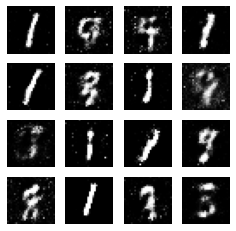

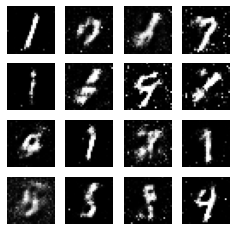

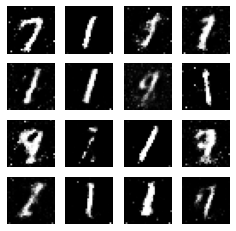

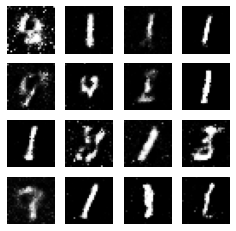

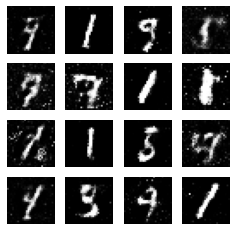

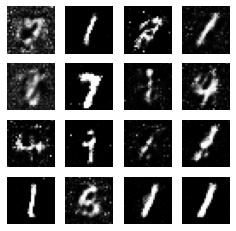

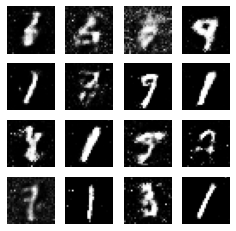

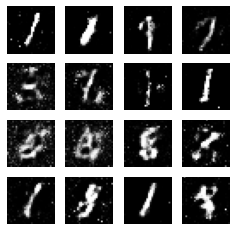

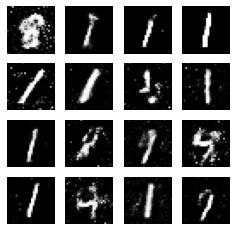

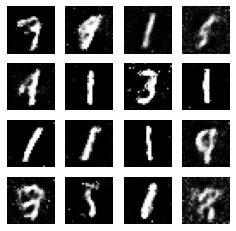

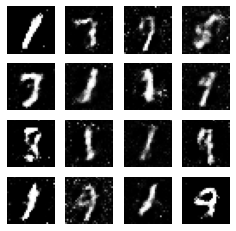

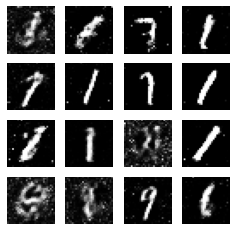

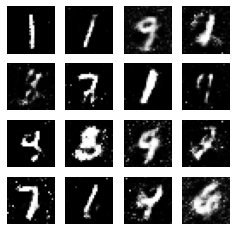

In [55]:
#activate hyperparameters
iteration = 20000
batchSize = 128
sampleInter = 1000

training(iteration,batchSize,sampleInter)